In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score

In [8]:
# Load dataset
df = pd.read_csv('SpamCollectionSMS.txt', sep='\t', names=["label","message"])

In [7]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
# missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [9]:
#convert label into numbers
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

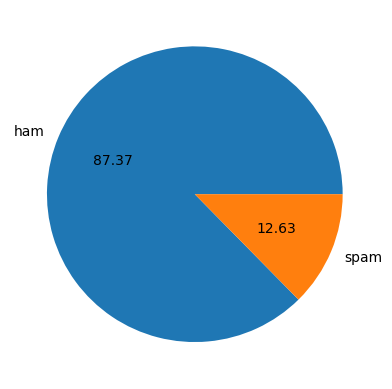

In [16]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Apply function to count characters
df["length"] = df["message"].apply(len)
# Apply function to count words
df.loc[:, 'words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
# Apply function to count sentences
df.loc[:, 'sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\DELL\AppData\Local\Temp\ipykernel_4756\1217414516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length"] = df["message"].apply(len)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4756\1217414516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_4756\1217414516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [20]:
df.head()

,label,message,length,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
# ham
df[df['label'] == 0][['length','words','sentences']].describe()

,length,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.988043,17.273472,1.827724
std,56.739047,13.604143,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# spam
df[df['label'] == 1][['length','words','sentences']].describe()

,length,words,sentences
count,653.000000,653.000000,653.000000
mean,138.130168,27.764165,2.986217
std,29.937254,6.993827,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='length', ylabel='Count'>

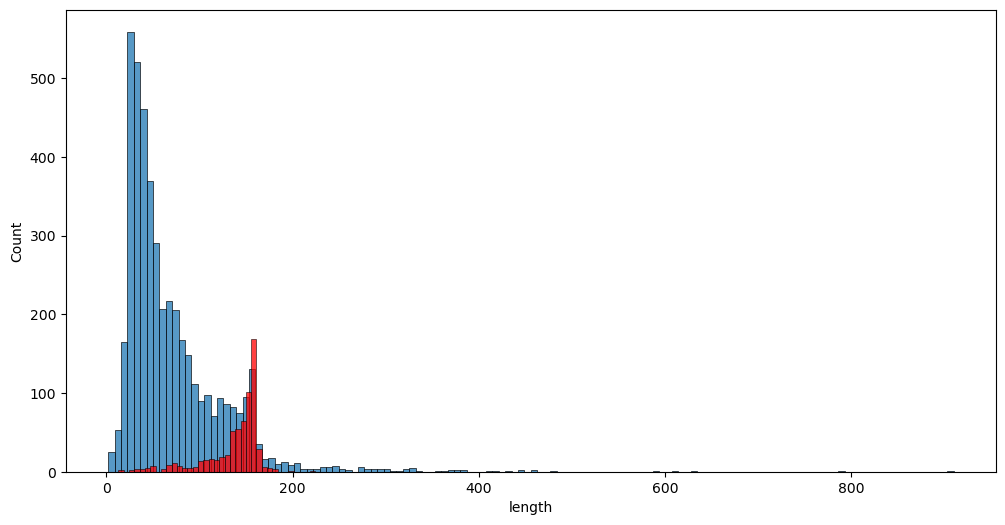

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['length'])
sns.histplot(df[df['label'] == 1]['length'],color='red')

<Axes: xlabel='words', ylabel='Count'>

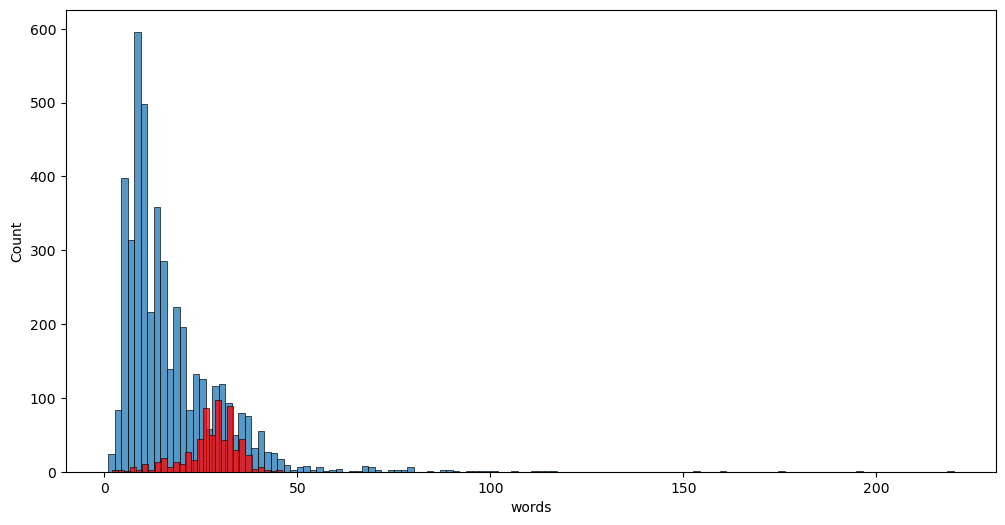

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['words'])
sns.histplot(df[df['label'] == 1]['words'],color='red')

C:\Users\DELL\AppData\Local\Temp\ipykernel_4756\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

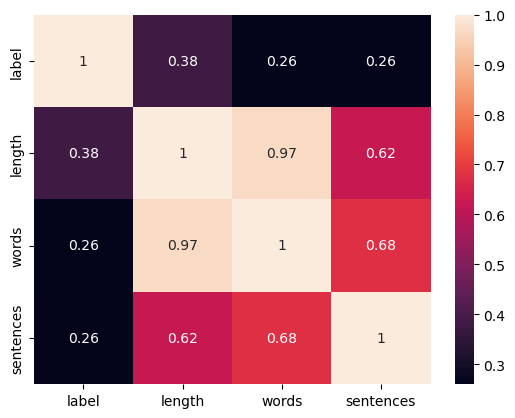

In [26]:
sns.heatmap(df.corr(),annot=True)

In [17]:
import string
def transform_text(message):
    message = message.lower()  # Convert the message to lowercase
    message = nltk.word_tokenize(message)  # Tokenize the message into words
    y = [] # Initialize an empty list to store cleaned words
    
    # Loop through each word in the tokenized message
    for i in message:
        # Check if the word is alphanumeric
        if i.isalnum():
            y.append(i)  # If the word is alphanumeric, append it to the list
    message = y[:] # Update 'message' with the cleaned list of words
    y.clear()  # Clear the temporary list 'y'
    
    # Loop through each word in the cleaned message
    for i in message:
        # Check if the word is not a stopword and not a punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))  # If the word passes the conditions, append its stem to the list
    message = y[:]  # Update 'message' with the stemmed list of words
    y.clear() # Clear the temporary list 'y'
    
    # Loop through each word in the stemmed message
    for i in message:
        y.append(ps.stem(i)) # Append the stemmed word to the list
    
    return " ".join(y) # Join the stemmed words into a single string and return it

In [20]:
# Initialize the Porter Stemmer
ps = PorterStemmer()

In [21]:
df['transformed_text'] = df['message'].apply(transform_text)

In [22]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [24]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

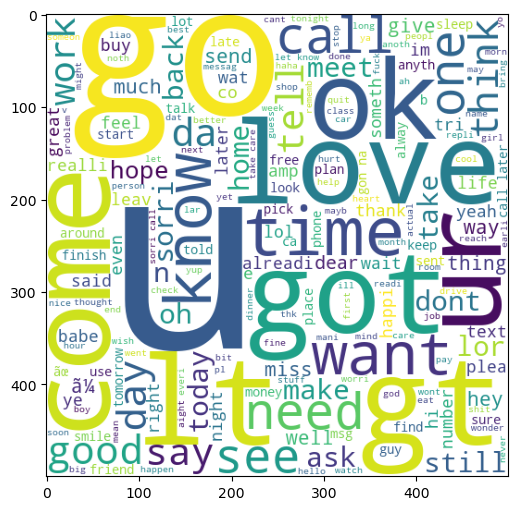

In [25]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

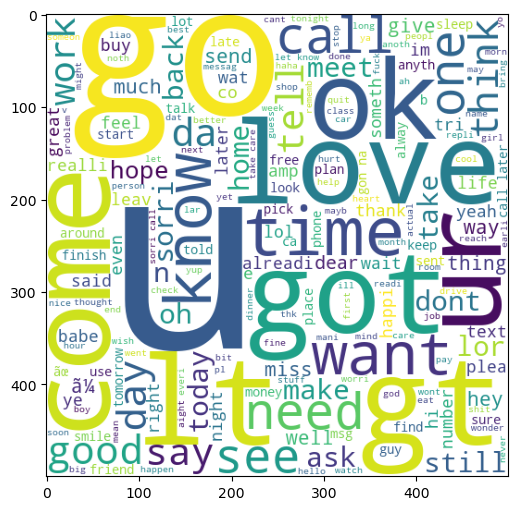

In [26]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [27]:
# Text Vectorization
# using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [30]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       1.00      0.83      0.91       139

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[976   0]
 [ 23 116]]


In [39]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [40]:
y_pred = mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.979372197309417
Precision 1.0


In [41]:
#Example
def classify_email(text):
    text_tfidf = tfidf.transform([text])
    prediction = mnb.predict(text_tfidf)
    return prediction[0]

In [43]:
sample_email = "Call me, when you're free"
predicted_label = classify_email(sample_email)
print("\nPredicted Label for the sample email:", predicted_label)


Predicted Label for the sample email: 0
